In [ ]:
%pylab inline
import numpy as numpy
#import modin.pandas as pd
import pandas as pd
import seaborn as sns
#import neptune.new as neptune
from sklearn.model_selection import train_test_split
import qgrid
import os
import scipy.stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from import_data import *

In [2]:
!ls data

test_data.csv
train_data.csv
train_labels.csv


In [3]:
df_train, df_test, df_train_labels = data_load()
data = [df_train, df_test, df_train_labels]
names = ["df_train", "df_test", "df_train_labels"]

In [ ]:
#pd.set_option('display.max_columns', None)

In [4]:
print(df_train.shape, df_test.shape, df_train_labels.shape)

(3750, 10000) (1250, 10000) (3750, 1)


In [21]:
def data_info(data):
    """General data information"""
    print('''Data shape: {}
    ##################################
    Data sample: {}
    ##################################
    Data describe: {}
    ##################################
    Data quantile: {}'''.format(data.shape, 
                                data.sample(5),
                                data.describe(),
                                data.quantile([0.01, 0.25, 0.5, 0.75, 0.99])))
    
    
def check_missing(data):
    """The number of blank values in the column"""
    for column in data.columns:
        missing = column, data[column].isnull().sum()
        if missing[1] == 0: continue


def outliners(data):
    """Number of outlier upper and lower values"""
    q1 = data.quantile(0.25) 
    q3 = data.quantile(0.75) 
    iqr = q3 - q1
    
    low_boundary = (q1 - 1.5 * iqr)
    upp_boundary = (q3 + 1.5 * iqr)
    num_of_outliers_L = (data[iqr.index] < low_boundary).sum()
    num_of_outliers_U = (data[iqr.index] > upp_boundary).sum()
    outliers_15iqr = pd.DataFrame({'lower_boundary':low_boundary, 'upper_boundary':upp_boundary,
                               'num_of_outliers_L':num_of_outliers_L, 'num_of_outliers_U':num_of_outliers_U})

    print(outliers_15iqr)

    
def skew_kurtosis(data):
    '''Calculation of kurtosis and skewness'''
    data.skew()
    data.kurtosis().abs().sort_values()
    return data.agg(['kurtosis', 'skew']).T


def density(data):
    '''Density plot and boxplot for 4 random columns'''
    f, axes = plt.subplots(2, 2, figsize=(15, 10))
    sns.distplot(data[random.randint(3750)], color='skyblue', ax=axes[0, 0])
    sns.distplot(data[random.randint(3750)], color='olive', ax=axes[0, 1])
    sns.distplot(data[random.randint(3750)], color='gold', ax=axes[1, 0])
    sns.distplot(data[random.randint(3750)], color='teal', ax=axes[1, 1])
    plt.show();
    
    f, axes = plt.subplots(2, 2, figsize=(15, 10))
    sns.boxplot(x=data[random.randint(3750)], color='skyblue', ax=axes[0, 0])
    sns.boxplot(x=data[random.randint(3750)], color='olive', ax=axes[0, 1])
    sns.boxplot(x=data[random.randint(3750)], color='gold', ax=axes[1, 0])
    sns.boxplot(x=data[random.randint(3750)], color='teal', ax=axes[1, 1])
    plt.show();
    

def distribution(data):
    '''Computing the normal distribution for one random column'''
    feature = np.random.randint(3750)

    alpha = 0.05
    p_value = scipy.stats.normaltest(data[feature])[1]
    if p_value < alpha:
        print('''The null hypothesis was rejected for the variable {}.
        The variable does not come from the normal distribution. P-value: {}'''.format(feature, p_value))
    else:
        print('''For the variable {} no grounds for rejecting the null
        hypothesis were found. The variable come from the normal distribution. P-value: {}'''.format(feature, p_value))

# df_train

In [12]:
data_info(df_train)

Data shape: (3750, 10000)
    ##################################
    Data sample:          0        1          2          3          4         5        6     \
3657  194.112 -154.478 -56144.917  88203.835    509.750  -419.018  151.249   
2710  298.540  209.945  12907.857  13267.942 -52271.014   635.932 -652.067   
2162  551.535 -327.547  21712.647 -35017.148  -4215.791  -850.444 -263.152   
1179  307.275  185.976  66528.466 -40331.269  28773.569  -181.244  298.650   
85   -156.042  304.668  19611.593  14173.206 -23478.841 -1037.913  515.991   

          7        8        9     ...     9990      9991     9992     9993  \
3657   925.648  616.870  119.641  ...  -73.857  -327.014  -83.341  879.211   
2710  1503.054  471.766 -173.782  ...  -74.667  -405.115  -52.308 -811.673   
2162   491.423   61.254  123.795  ... -138.509   634.083  329.627  266.897   
1179  -595.784 -480.493 -181.499  ...  142.821 -1048.877 -277.290  388.503   
85    -733.001 -369.940  377.629  ...   61.652   152.789 -3

In [15]:
print('Empty values: {}'.format(check_missing(df_train)))

Empty values: None


In [16]:
outliners(df_train)

      lower_boundary  upper_boundary  num_of_outliers_L  num_of_outliers_U
0        -733.125125      785.123875                 14                 14
1        -572.502375      593.254625                 11                 12
2     -117656.670500   118003.465500                 15                 14
3     -155914.012875   158447.544125                  9                  9
4      -57840.748250    57929.781750                 14                 17
...              ...             ...                ...                ...
9995    -1718.008875     1711.346125                 16                 22
9996     -547.474250      568.253750                 13                  6
9997    -2212.585000     2190.831000                  8                 15
9998    -1702.173625     1705.775375                  8                 15
9999    -1985.330250     2074.675750                 16                 16

[10000 rows x 4 columns]


In [17]:
skew_kurtosis(df_train)

,kurtosis,skew
0,0.010253,0.023915
1,-0.004958,0.036784
2,0.009133,-0.001958
3,-0.024319,-0.017559
4,0.119193,0.017595
...,...,...
9995,0.156313,0.037435
9996,-0.065115,-0.041411
9997,0.079554,0.078989
9998,-0.059513,0.040062


C:\Users\Dom\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dom\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dom\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

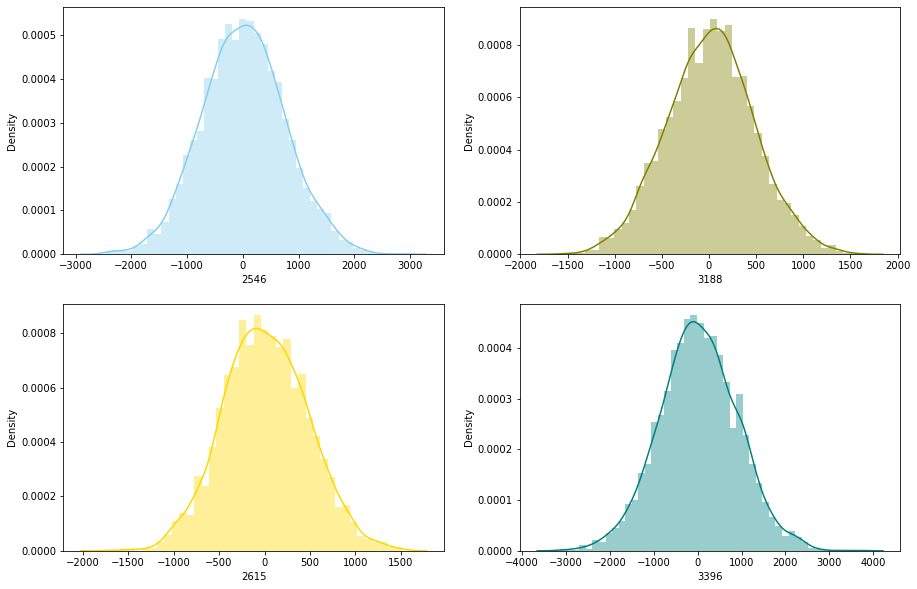

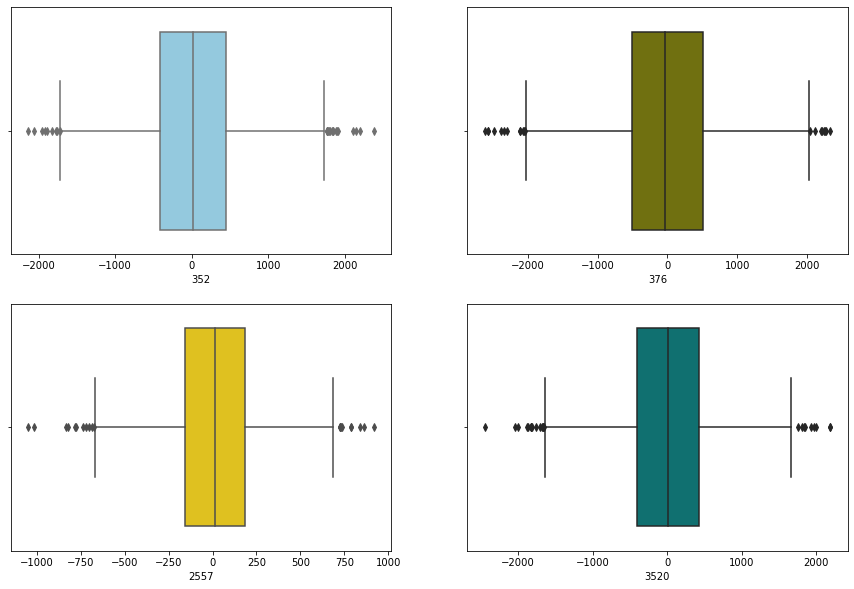

In [18]:
density(df_train)

In [22]:
distribution(df_train)

For the variable 234 no grounds for rejecting the null
        hypothesis were found. The variable come from the normal distribution. P-value: 0.19579034170809698


# df_test

In [23]:
data_info(df_test)

Data shape: (1250, 10000)
    ##################################
    Data sample:          0        1          2          3          4        5         6     \
336   353.485  291.483 -10094.921  34994.187   2837.865  906.012   988.706   
512  -149.586  141.692   -922.911  34476.154 -22660.778  575.801  -586.521   
1137 -378.119  181.028 -86273.334 -55067.156  29255.185  -51.945  1074.445   
910   391.969 -205.690  -5211.675  28833.239  31419.287 -463.393  1223.775   
732    69.079   20.699  60027.843  69901.687   1196.451 -637.303   640.883   

         7        8        9     ...     9990      9991     9992     9993  \
336  -125.402  387.008  -43.280  ...  375.405   417.884  226.413   -8.504   
512   926.178 -132.295   72.355  ...  491.328   113.719  229.816 -341.026   
1137 -212.992 -219.758  -90.871  ...  -47.185  1224.460  234.098  180.349   
910   224.023   93.356   70.620  ...  -22.770  -311.708   27.460  -94.327   
732  -389.262   42.840  192.627  ... -477.073    25.977 -121.466

In [24]:
print('Empty values: {}'.format(check_missing(df_test)))

Empty values: None


In [25]:
outliners(df_test)

      lower_boundary  upper_boundary  num_of_outliers_L  num_of_outliers_U
0        -720.111875      728.437125                  9                  7
1        -549.095125      603.879875                  4                  2
2     -115718.768125   119503.640875                  9                  1
3     -157066.049500   152285.858500                  2                  8
4      -56267.132625    57110.778375                 10                  2
...              ...             ...                ...                ...
9995    -1687.030500     1757.149500                  4                  7
9996     -556.109500      585.396500                  5                  3
9997    -2171.490625     2180.610375                  6                  3
9998    -1676.793875     1684.655125                  2                  2
9999    -2106.831375     2151.269625                  6                  1

[10000 rows x 4 columns]


In [26]:
skew_kurtosis(df_test)

,kurtosis,skew
0,0.424115,-0.038244
1,-0.018814,0.048131
2,0.153853,-0.097425
3,-0.043693,0.055751
4,0.448668,-0.205048
...,...,...
9995,0.059392,0.038944
9996,-0.122063,-0.117525
9997,-0.124856,-0.015890
9998,-0.064332,0.009265


C:\Users\Dom\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dom\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dom\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

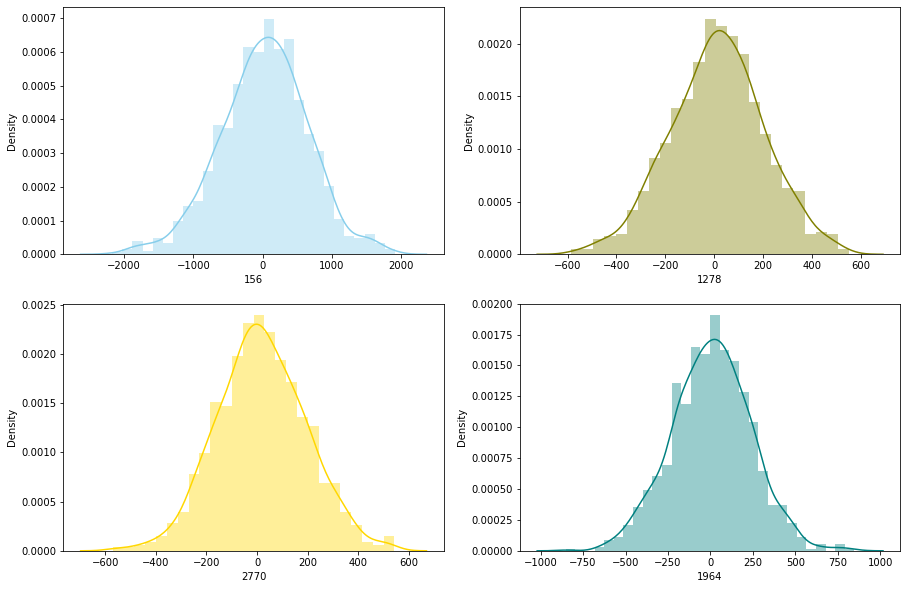

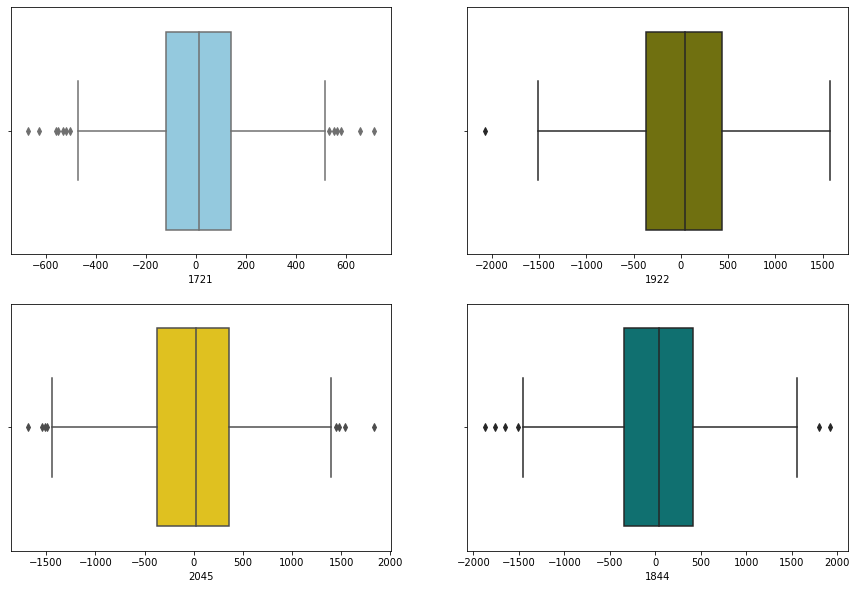

In [27]:
density(df_test)

In [28]:
distribution(df_test)

The null hypothesis was rejected for the variable 2346.
        The variable does not come from the normal distribution. P-value: 0.035130422075311286


# df_train_labels

In [30]:
data_info(df_train_labels)

Data shape: (3750, 1)
    ##################################
    Data sample:       0
2647  1
2254  1
1762  1
1096  1
2455  1
    ##################################
    Data describe:                 0
count  3750.00000
mean      0.80000
std       0.60008
min      -1.00000
25%       1.00000
50%       1.00000
75%       1.00000
max       1.00000
    ##################################
    Data quantile:         0
0.01 -1.0
0.25  1.0
0.50  1.0
0.75  1.0
0.99  1.0


In [31]:
print('Empty values: {}'.format(check_missing(df_train_labels)))

Empty values: None


In [29]:
df_train_labels.value_counts()

 1    3375
-1     375
dtype: int64